In [1]:
import cv2

In [ ]:
cap = cv2.VideoCapture(0)
import random
while True :
    ret , frame   = cap.read()
    frame = cv2.cvtColor(frame , cv2.COLOR_BGR2GRAY)
    shape = frame.shape
    for i in range(1000):
        x_cord = random.randint(0,400)
        y_cord = random.randint(0,400)
        frame[x_cord , y_cord] = 255
        
    for i in range(1000):
        x_cord = random.randint(0,400)
        y_cord = random.randint(0,400)
        frame[x_cord , y_cord] = 0
        
        
    cv2.imshow("camera", frame)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break 

In [2]:
import matplotlib.pyplot as plt
import cv2

In [3]:
img = cv2.imread('./puppy.jpg')
img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

In [4]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'blue_frame')

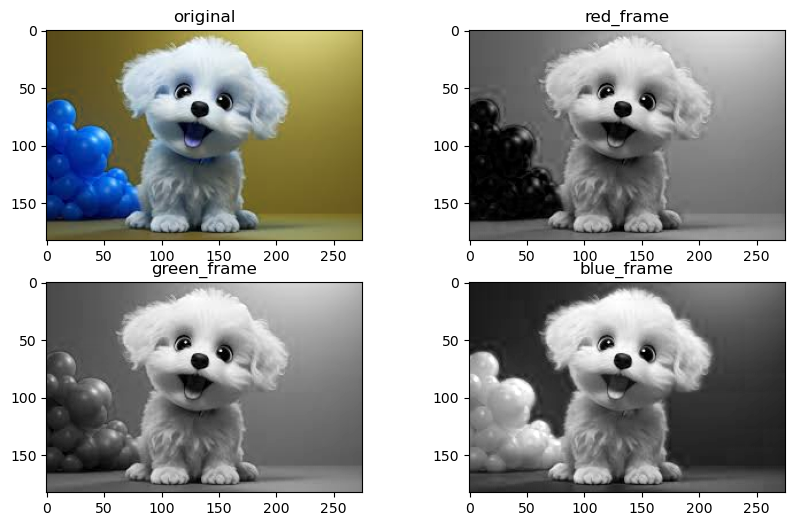

In [5]:
plt.figure(figsize = (10,6))
plt.subplot(2, 2,1)
plt.imshow(img)
plt.title("original")




plt.subplot(2, 2,2)
plt.imshow(img[:,:,0] , cmap= "gray")
plt.title("red_frame")

plt.subplot(2, 2,3)
plt.imshow(img[:,:,1] , cmap= "gray")
plt.title("green_frame")


plt.subplot(2, 2,4)
plt.imshow(img[:,:,2] , cmap= "gray")
plt.title("blue_frame")


Text(0.5, 1.0, 'gray')

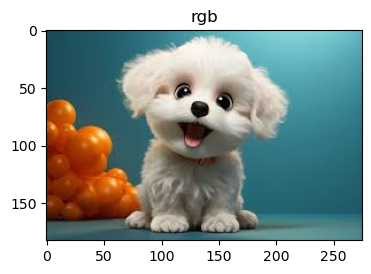

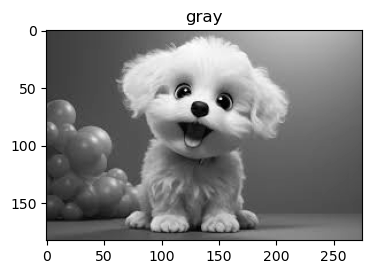

In [6]:
plt.figure(figsize = (10,6))
plt.subplot(2, 2,3)
plt.imshow(img_rgb)
plt.title("rgb")
plt.figure(figsize = (10,6))
plt.subplot(2, 2,2)
plt.imshow(gray,cmap = "gray")
plt.title("gray")



In [7]:
img.shape

(183, 275, 3)

In [8]:
img_big = cv2.resize(img , (200,600))

In [9]:
img = cv2.resize(cv2.imread("./puppy.jpg"),(256,256))
img2 = cv2.resize(cv2.imread("./player.jpg"),(256,256))

In [10]:
blended = cv2.addWeighted(src1 = img , src2 = img2 , alpha = 0.5 , beta = 0.5 , gamma = 0)

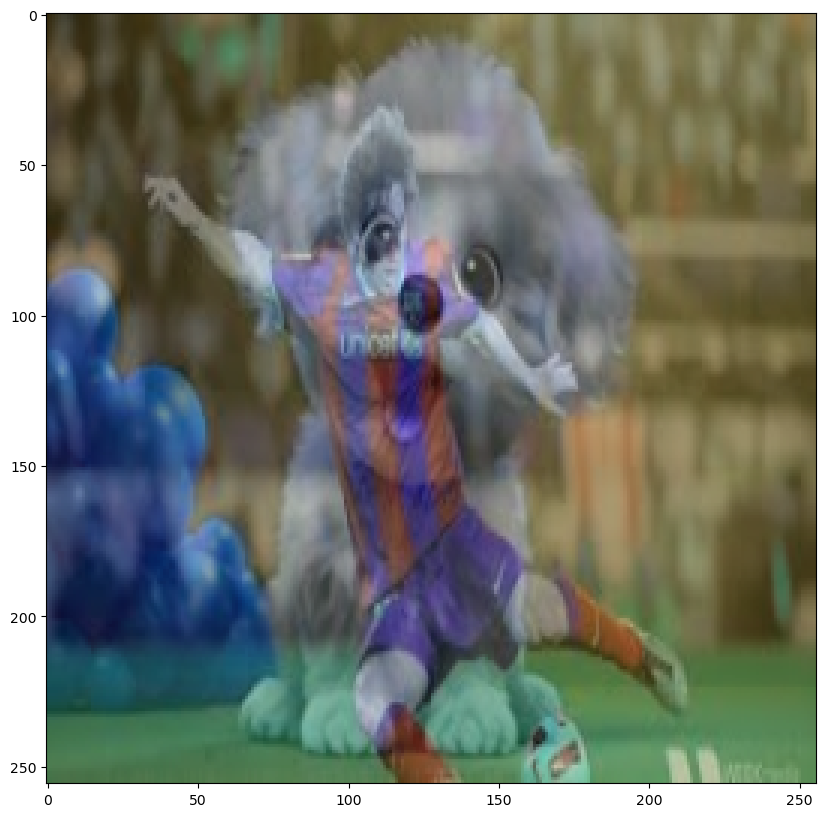

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(blended)

In [12]:
import numpy as np

In [13]:
img2_gray = cv2.cvtColor(img2 , cv2.COLOR_BGR2GRAY)

In [14]:
gamma = 2

In [15]:
img2_gray_pow = np.power(img2_gray , gamma)

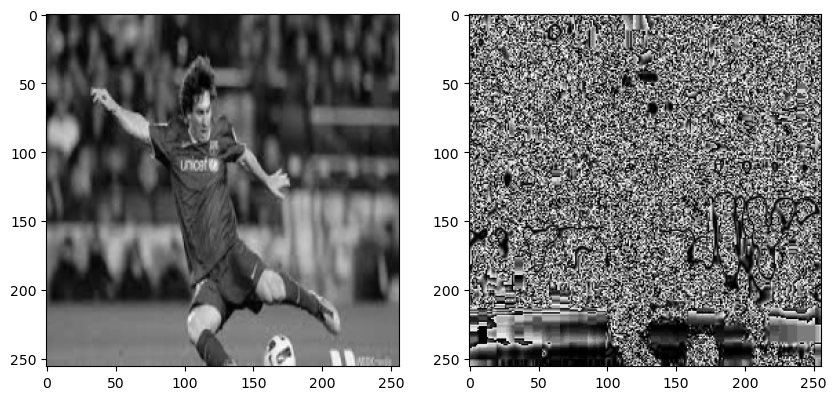

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img2_gray , cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img2_gray_pow , cmap='gray')

# 2ND CLASS


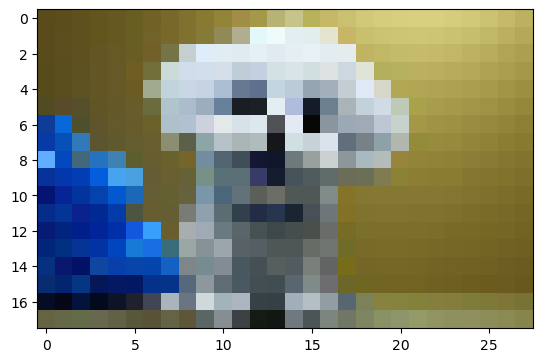

In [17]:
img = cv2.imread("./puppy.jpg")

puppy_small = cv2.resize(img , (0,0),fx=0.1 , fy= 0.1)
plt.imshow(puppy_small)

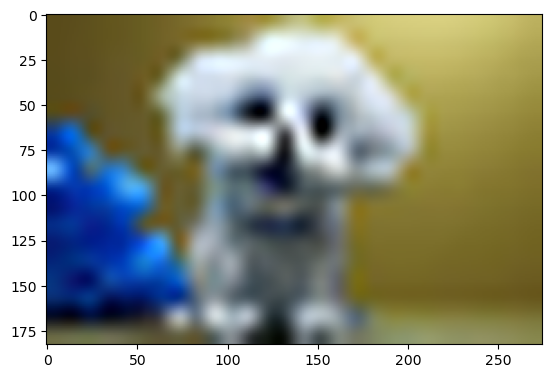

In [18]:
bigger = cv2.resize(puppy_small , (275,183), interpolation= cv2.INTER_CUBIC  )
plt.imshow(bigger)

## filtering


In [49]:
img = cv2.imread("./sudoku.jpg", cv2.IMREAD_GRAYSCALE)

In [50]:
sobelx = cv2.Sobel(img, cv2.CV_64F ,1 ,0 , ksize= 5)
sobely = cv2.Sobel(img, cv2.CV_64F ,0 ,1 , ksize= 5)

In [51]:
img_sobel = sobelx+sobely

In [52]:
laplacian = cv2.Laplacian(img , cv2.CV_64F)
canny = cv2.Canny(img , 100,200)
                   

(<Axes: title={'center': 'canny'}>,
 Text(0.5, 1.0, 'canny'))

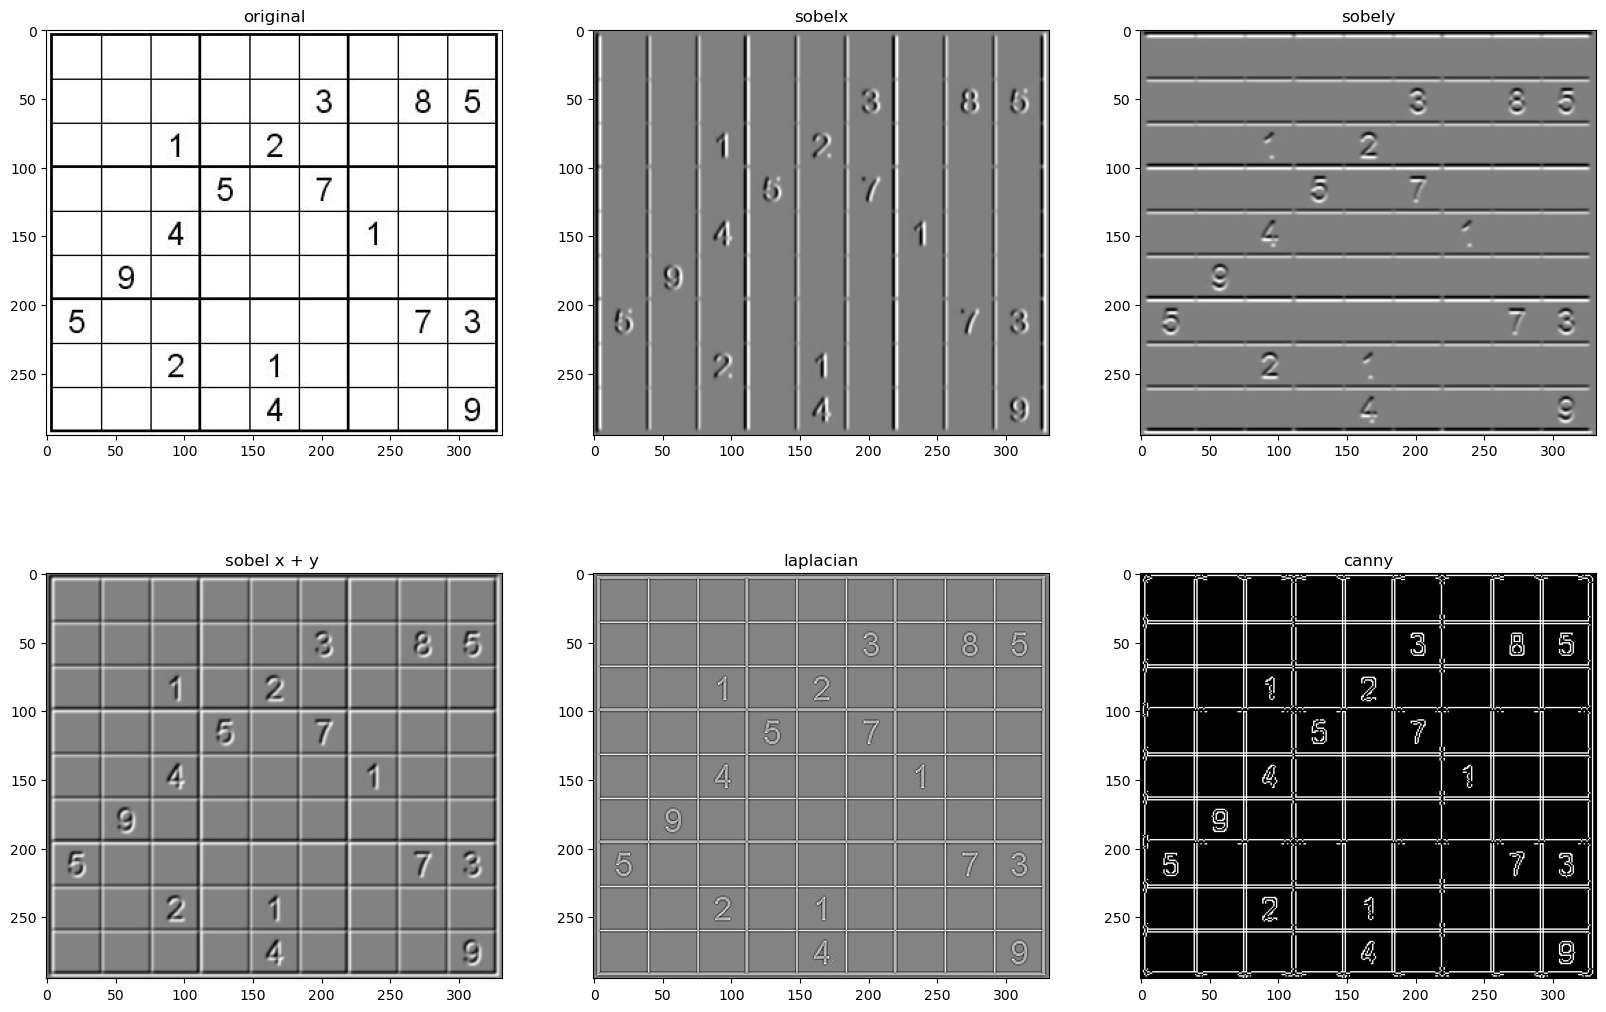

In [53]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1),plt.imshow(img , cmap='gray' ), plt.title("original")
plt.subplot(3,3,2),plt.imshow(sobelx , cmap='gray'), plt.title("sobelx")
plt.subplot(3,3,3),plt.imshow(sobely , cmap='gray'), plt.title("sobely")

plt.subplot(3,3,4),plt.imshow(img_sobel , cmap='gray'), plt.title("sobel x + y ")
plt.subplot(3,3,5),plt.imshow(laplacian , cmap='gray'), plt.title("laplacian")
plt.subplot(3,3,6),plt.imshow(canny , cmap='gray'), plt.title("canny")



In [54]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])


img_prewittx = cv2.filter2D(img , -1 , kernelx)

img_prewitty = cv2.filter2D(img , -1 , kernely)

img_prewitt = img_prewittx+img_prewitty

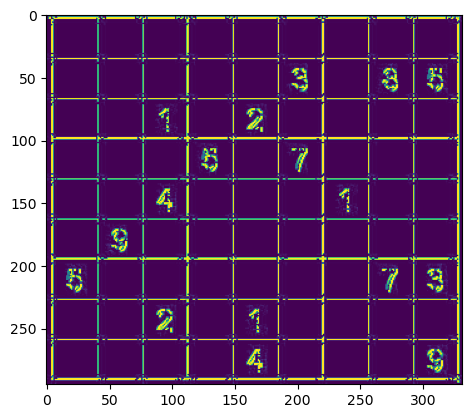

In [55]:
plt.imshow(img_prewitt)

## fourier transform

In [57]:
img = cv2.imread("player.jpg", cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)

In [60]:
fshift = np.fft.fftshift(f)
mag_spectrum = 20*np.log(np.abs(fshift))


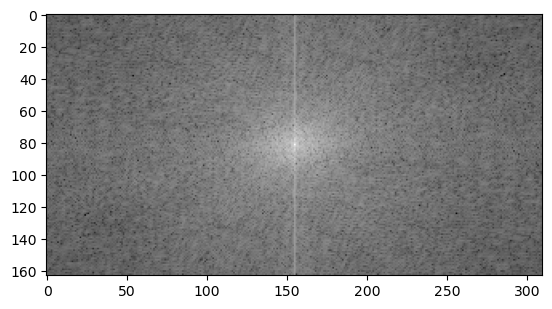

In [62]:
plt.imshow(mag_spectrum , cmap='gray')

In [ ]:
rows , cols = img.shape
crows , ccols = rows//2 , cols//2
mask = np.zeros((rows,cols) , np.uint8)
mask[crows-30:crows+30 ,ccols - 30: ccols+30 ] = 1
plt.imshow(mask , cmap='gray')